In [1]:
%%html
<h1><a id='1' style="color: black">I. INTRODUCTION</a></h1>

%%html
<h1><Li style="list-style-type: square"><span style="color: black">Question Statement</span></Li></h1>
Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

Statistics and Machine Learning can help us answer these questions and predict various relations and variables given the data.
Apparent temperature is the temperature that it feels like to our body because of other weather variables other than temperature.This is generally higher incase of high humidity.

In this project i am trying to predict the apparent temperature given other weather variables in an hourly manner.

<h2><Li style="list-style-type: square"><span style="color: black">Objective</span></li></h2>
<li>Clean the data and drop useless columns.</li>
<li>Make a EDA report.</li>
<li>Visualize the distributions of various features and correlations between them.</li>
<li>Feature engineering to extract the correct features for the model.</li>
<li>Train a regression model to predict the  temperature.</li>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loading TEMP_DATA2.csv as in a variable named "df"
df = pd.read_csv('E://temp prediction//TEMP_DATA2.csv')
# Showing First five elements.
df.head()

,LAT,LON,YEAR,MONTH,DAY,PRECIPITATION,SPECIFIC _HUMIDITY,RELATIVE_HUMIDITY,SURFACE_PRESSURE,T2M_RANGE,EARTH_SKIN_TEMPERATURE,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,TEMPERATURE,WS10M_MIN,WS10M_MAX,WS50M,WIND_SPEED
0,23.80811,86.50621,2014,7,20,10.43,22.19,87.13,97.36,5.22,28.75,26.33,26.33,31.79,26.57,28.68,0.79,6.84,5.79,4.25
1,23.80811,86.50621,2014,7,21,6.96,21.37,86.71,97.23,5.77,28.22,25.68,25.68,31.37,25.60,28.10,3.59,8.63,8.62,6.54
2,23.80811,86.50621,2014,7,22,4.24,20.96,87.32,97.55,6.15,27.85,25.42,25.42,31.71,25.56,27.71,5.65,9.20,10.09,7.76
3,23.80811,86.50621,2014,7,23,0.50,19.46,80.80,97.93,7.49,28.32,24.25,24.25,32.07,24.58,27.85,2.74,4.97,5.68,3.94
4,23.80811,86.50621,2014,7,24,5.12,19.70,80.37,98.00,6.88,28.68,24.45,24.45,31.43,24.55,28.16,0.24,2.20,2.09,1.37


In [3]:
# df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LAT                     2558 non-null   float64
 1   LON                     2558 non-null   float64
 2   YEAR                    2558 non-null   int64  
 3   MONTH                   2558 non-null   int64  
 4   DAY                     2558 non-null   int64  
 5   PRECIPITATION           2558 non-null   float64
 6   SPECIFIC _HUMIDITY      2558 non-null   float64
 7   RELATIVE_HUMIDITY       2558 non-null   float64
 8   SURFACE_PRESSURE        2558 non-null   float64
 9   T2M_RANGE               2558 non-null   float64
 10  EARTH_SKIN_TEMPERATURE  2558 non-null   float64
 11  T2MDEW                  2558 non-null   float64
 12  T2MWET                  2558 non-null   float64
 13  T2M_MAX                 2558 non-null   float64
 14  T2M_MIN                 2558 non-null   

In [4]:
#shape of df
df.shape

(2558, 20)

In [5]:
#size of df
df.size

51160

In [6]:
#information of column
list(df.columns)

['LAT',
 'LON',
 'YEAR',
 'MONTH',
 'DAY',
 'PRECIPITATION',
 'SPECIFIC _HUMIDITY',
 'RELATIVE_HUMIDITY',
 'SURFACE_PRESSURE',
 'T2M_RANGE',
 'EARTH_SKIN_TEMPERATURE',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'TEMPERATURE',
 'WS10M_MIN',
 'WS10M_MAX',
 'WS50M',
 'WIND_SPEED']

In [7]:
#describing the df
df.describe(include='all')

,LAT,LON,YEAR,MONTH,DAY,PRECIPITATION,SPECIFIC _HUMIDITY,RELATIVE_HUMIDITY,SURFACE_PRESSURE,T2M_RANGE,EARTH_SKIN_TEMPERATURE,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,TEMPERATURE,WS10M_MIN,WS10M_MAX,WS50M,WIND_SPEED
count,2.558000e+03,2.558000e+03,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000
mean,2.380811e+01,8.650621e+01,2017.549648,6.522674,15.732604,3.948675,13.829375,65.203116,98.721474,11.114844,25.329844,17.444425,17.384867,31.192815,20.078030,25.244996,1.413616,4.103550,4.084042,2.736188
std,4.086420e-13,1.236586e-12,2.062117,3.448837,8.801045,8.076024,5.645856,19.190256,0.612017,4.208783,6.431904,7.180731,7.214958,5.454565,6.268053,5.635541,0.930122,1.489752,1.498984,1.088483
min,2.380811e+01,8.650621e+01,2014.000000,1.000000,1.000000,0.000000,3.730000,13.340000,97.150000,2.150000,10.200000,-1.010000,-0.850000,14.590000,4.310000,10.120000,0.010000,1.160000,1.060000,0.790000
25%,2.380811e+01,8.650621e+01,2016.000000,4.000000,8.000000,0.000000,8.432500,50.192500,98.200000,7.112500,20.180000,11.230000,11.152500,27.402500,14.910000,20.952500,0.652500,3.030000,3.032500,2.010000
50%,2.380811e+01,8.650621e+01,2018.000000,7.000000,16.000000,0.310000,13.735000,67.060000,98.720000,11.660000,27.130000,18.740000,18.630000,30.950000,22.715000,27.120000,1.330000,3.835000,3.915000,2.540000
75%,2.380811e+01,8.650621e+01,2019.000000,10.000000,23.000000,4.527500,19.910000,82.975000,99.260000,14.550000,29.357500,24.710000,24.697500,34.505000,25.327500,28.887500,2.007500,4.900000,4.940000,3.270000
max,2.380811e+01,8.650621e+01,2021.000000,12.000000,31.000000,108.910000,22.880000,95.570000,99.970000,21.110000,38.720000,26.890000,27.570000,46.150000,32.280000,37.460000,7.330000,13.830000,14.760000,11.540000


In [8]:
%%html
<h1><a id="2" style="color: teal">II. DATA CLEANING</a></h1>

In [9]:
%%html
<h2><Li style="list-style-type: square"><span style="color: teal">Statement:</span></Li></h2>
<li>Perform data cleaning using pandas library. Which includes replacing the miscoded information and handling missing data.</li>

In [10]:
# information of df before cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LAT                     2558 non-null   float64
 1   LON                     2558 non-null   float64
 2   YEAR                    2558 non-null   int64  
 3   MONTH                   2558 non-null   int64  
 4   DAY                     2558 non-null   int64  
 5   PRECIPITATION           2558 non-null   float64
 6   SPECIFIC _HUMIDITY      2558 non-null   float64
 7   RELATIVE_HUMIDITY       2558 non-null   float64
 8   SURFACE_PRESSURE        2558 non-null   float64
 9   T2M_RANGE               2558 non-null   float64
 10  EARTH_SKIN_TEMPERATURE  2558 non-null   float64
 11  T2MDEW                  2558 non-null   float64
 12  T2MWET                  2558 non-null   float64
 13  T2M_MAX                 2558 non-null   float64
 14  T2M_MIN                 2558 non-null   

In [11]:
# dropping unnecessary Columns. (which includes text.)
cols = ['LAT','LON','PRECIPITATION','T2M_RANGE','EARTH_SKIN_TEMPERATURE','T2MDEW','T2MWET','WS10M_MIN','WS10M_MAX','WS50M']
df = df.drop(cols,axis=1)

In [12]:
#information after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                2558 non-null   int64  
 1   MONTH               2558 non-null   int64  
 2   DAY                 2558 non-null   int64  
 3   SPECIFIC _HUMIDITY  2558 non-null   float64
 4   RELATIVE_HUMIDITY   2558 non-null   float64
 5   SURFACE_PRESSURE    2558 non-null   float64
 6   T2M_MAX             2558 non-null   float64
 7   T2M_MIN             2558 non-null   float64
 8   TEMPERATURE         2558 non-null   float64
 9   WIND_SPEED          2558 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 200.0 KB


In [13]:
#combining YEAR ,MONTH,DAY in a single column
df["DATE"] = pd.to_datetime(df[['YEAR','MONTH','DAY']])

In [14]:
df.head()

,YEAR,MONTH,DAY,SPECIFIC _HUMIDITY,RELATIVE_HUMIDITY,SURFACE_PRESSURE,T2M_MAX,T2M_MIN,TEMPERATURE,WIND_SPEED,DATE
0,2014,7,20,22.19,87.13,97.36,31.79,26.57,28.68,4.25,2014-07-20
1,2014,7,21,21.37,86.71,97.23,31.37,25.60,28.10,6.54,2014-07-21
2,2014,7,22,20.96,87.32,97.55,31.71,25.56,27.71,7.76,2014-07-22
3,2014,7,23,19.46,80.80,97.93,32.07,24.58,27.85,3.94,2014-07-23
4,2014,7,24,19.70,80.37,98.00,31.43,24.55,28.16,1.37,2014-07-24


In [15]:
# dropping unnecessary Columns. (which includes text.)
cols = ['DAY','MONTH','YEAR']
df = df.drop(cols,axis=1)

In [16]:
# shift column 'DATE' to first position
first_column = df.pop('DATE')

In [17]:
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'DATE', first_column)

In [18]:
# information  of df  after arranging the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                2558 non-null   datetime64[ns]
 1   SPECIFIC _HUMIDITY  2558 non-null   float64       
 2   RELATIVE_HUMIDITY   2558 non-null   float64       
 3   SURFACE_PRESSURE    2558 non-null   float64       
 4   T2M_MAX             2558 non-null   float64       
 5   T2M_MIN             2558 non-null   float64       
 6   TEMPERATURE         2558 non-null   float64       
 7   WIND_SPEED          2558 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 160.0 KB


In [19]:
# Showing First five elements after arrangement
df.head()

,DATE,SPECIFIC _HUMIDITY,RELATIVE_HUMIDITY,SURFACE_PRESSURE,T2M_MAX,T2M_MIN,TEMPERATURE,WIND_SPEED
0,2014-07-20,22.19,87.13,97.36,31.79,26.57,28.68,4.25
1,2014-07-21,21.37,86.71,97.23,31.37,25.60,28.10,6.54
2,2014-07-22,20.96,87.32,97.55,31.71,25.56,27.71,7.76
3,2014-07-23,19.46,80.80,97.93,32.07,24.58,27.85,3.94
4,2014-07-24,19.70,80.37,98.00,31.43,24.55,28.16,1.37


In [20]:
# Indexing according to date and time.
idata = df.sort_values(by=['DATE'])

In [21]:
# Setting Index
idata = idata.set_index('DATE')
idata.index

DatetimeIndex(['2014-07-20', '2014-07-21', '2014-07-22', '2014-07-23',
               '2014-07-24', '2014-07-25', '2014-07-26', '2014-07-27',
               '2014-07-28', '2014-07-29',
               ...
               '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
               '2021-07-19', '2021-07-20'],
              dtype='datetime64[ns]', name='DATE', length=2558, freq=None)

In [22]:
#removing duplicate values in the index
idata.index.drop_duplicates(keep='first')

DatetimeIndex(['2014-07-20', '2014-07-21', '2014-07-22', '2014-07-23',
               '2014-07-24', '2014-07-25', '2014-07-26', '2014-07-27',
               '2014-07-28', '2014-07-29',
               ...
               '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
               '2021-07-19', '2021-07-20'],
              dtype='datetime64[ns]', name='DATE', length=2558, freq=None)

In [23]:
# data after cleaning
idata.dropna()
idata.head()

,SPECIFIC _HUMIDITY,RELATIVE_HUMIDITY,SURFACE_PRESSURE,T2M_MAX,T2M_MIN,TEMPERATURE,WIND_SPEED
DATE,,,,,,,
2014-07-20,22.19,87.13,97.36,31.79,26.57,28.68,4.25
2014-07-21,21.37,86.71,97.23,31.37,25.60,28.10,6.54
2014-07-22,20.96,87.32,97.55,31.71,25.56,27.71,7.76
2014-07-23,19.46,80.80,97.93,32.07,24.58,27.85,3.94
2014-07-24,19.70,80.37,98.00,31.43,24.55,28.16,1.37


In [24]:
# information of data after after cleaning.
idata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2558 entries, 2014-07-20 to 2021-07-20
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SPECIFIC _HUMIDITY  2558 non-null   float64
 1   RELATIVE_HUMIDITY   2558 non-null   float64
 2   SURFACE_PRESSURE    2558 non-null   float64
 3   T2M_MAX             2558 non-null   float64
 4   T2M_MIN             2558 non-null   float64
 5   TEMPERATURE         2558 non-null   float64
 6   WIND_SPEED          2558 non-null   float64
dtypes: float64(7)
memory usage: 224.4 KB


In [25]:
# information of TEMPERATURE column
df["TEMPERATURE"]

0       28.68
1       28.10
2       27.71
3       27.85
4       28.16
        ...  
2553    27.11
2554    28.10
2555    28.23
2556    28.57
2557    27.39
Name: TEMPERATURE, Length: 2558, dtype: float64

<AxesSubplot:>

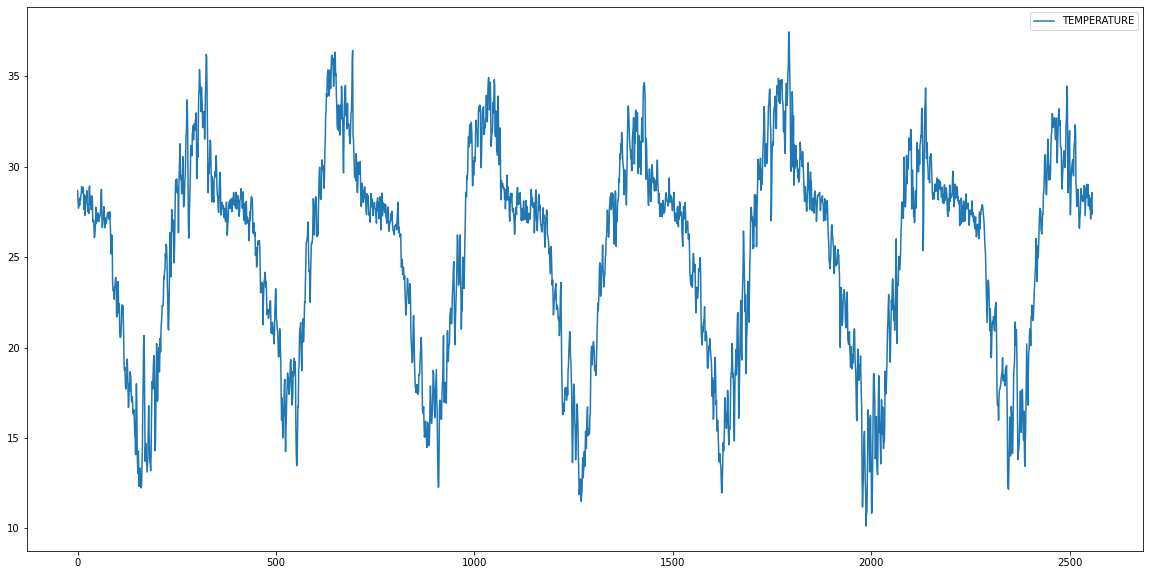

In [26]:
#plotting the data
df.plot(y="TEMPERATURE",figsize=(20,10))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                2558 non-null   datetime64[ns]
 1   SPECIFIC _HUMIDITY  2558 non-null   float64       
 2   RELATIVE_HUMIDITY   2558 non-null   float64       
 3   SURFACE_PRESSURE    2558 non-null   float64       
 4   T2M_MAX             2558 non-null   float64       
 5   T2M_MIN             2558 non-null   float64       
 6   TEMPERATURE         2558 non-null   float64       
 7   WIND_SPEED          2558 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 160.0 KB


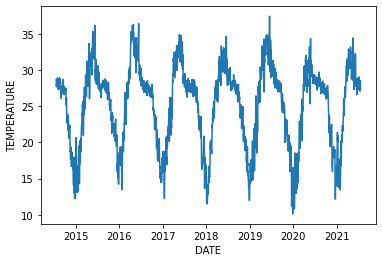

In [28]:
# Example 1 - Simple 1 line graph
# Assuming we want to investigate the TEMPERATURE by DATE

ax = sns.lineplot(x='DATE', y='TEMPERATURE', data = df)

# Notes: error bands show the confidence interval

In [29]:
#resampling the data into day format
idata2 = idata.resample(rule='D').mean()
idata2.head()

,SPECIFIC _HUMIDITY,RELATIVE_HUMIDITY,SURFACE_PRESSURE,T2M_MAX,T2M_MIN,TEMPERATURE,WIND_SPEED
DATE,,,,,,,
2014-07-20,22.19,87.13,97.36,31.79,26.57,28.68,4.25
2014-07-21,21.37,86.71,97.23,31.37,25.60,28.10,6.54
2014-07-22,20.96,87.32,97.55,31.71,25.56,27.71,7.76
2014-07-23,19.46,80.80,97.93,32.07,24.58,27.85,3.94
2014-07-24,19.70,80.37,98.00,31.43,24.55,28.16,1.37


<AxesSubplot:xlabel='DATE'>

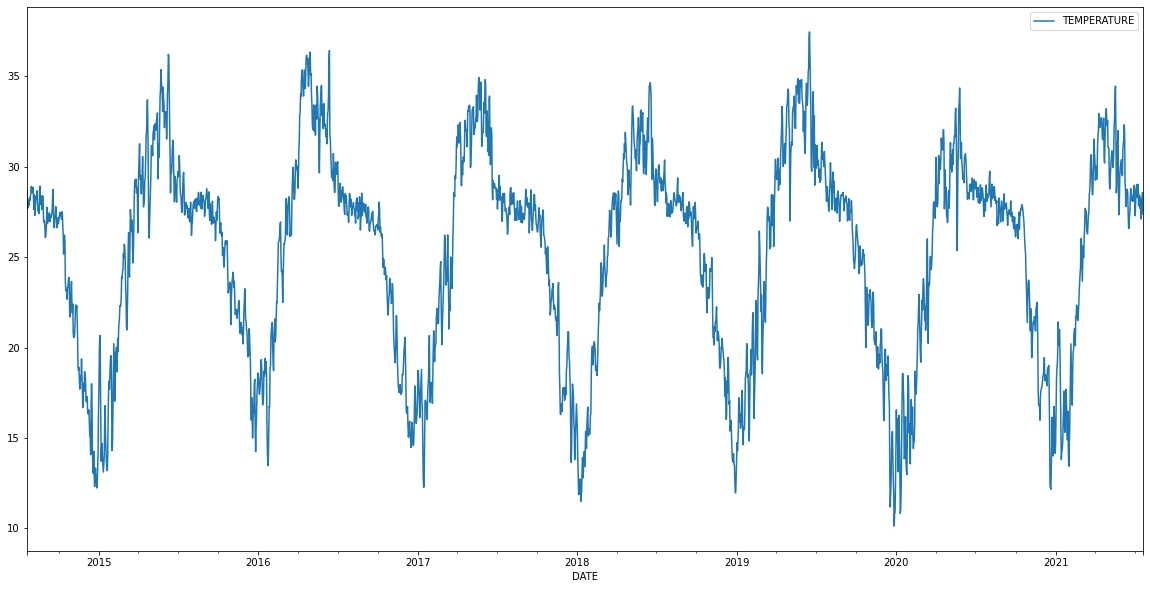

In [30]:
#ploting TEMPERATURE 
idata2.plot(y="TEMPERATURE",figsize=(20,10))

In [31]:
#extracting data from the month of August
aug2014 = idata['2014-08-01':'2014-08-31']
aug2014

,SPECIFIC _HUMIDITY,RELATIVE_HUMIDITY,SURFACE_PRESSURE,T2M_MAX,T2M_MIN,TEMPERATURE,WIND_SPEED
DATE,,,,,,,
2014-08-01,21.07,83.72,97.83,32.61,25.63,28.57,4.93
2014-08-02,22.35,88.28,97.64,31.44,26.06,28.62,2.61
2014-08-03,22.05,85.76,97.51,32.06,26.32,28.87,3.89
2014-08-04,22.00,88.20,97.25,31.74,25.98,28.31,7.13
2014-08-05,20.66,86.34,97.44,30.51,25.67,27.63,7.56
2014-08-06,20.62,82.49,97.85,32.68,25.19,28.46,3.49
2014-08-07,20.29,86.80,97.88,30.06,25.03,27.31,2.90
2014-08-08,21.22,89.29,97.85,30.51,25.39,27.58,2.36
2014-08-09,21.36,86.70,97.94,31.39,25.27,28.22,2.73


<AxesSubplot:xlabel='DATE'>

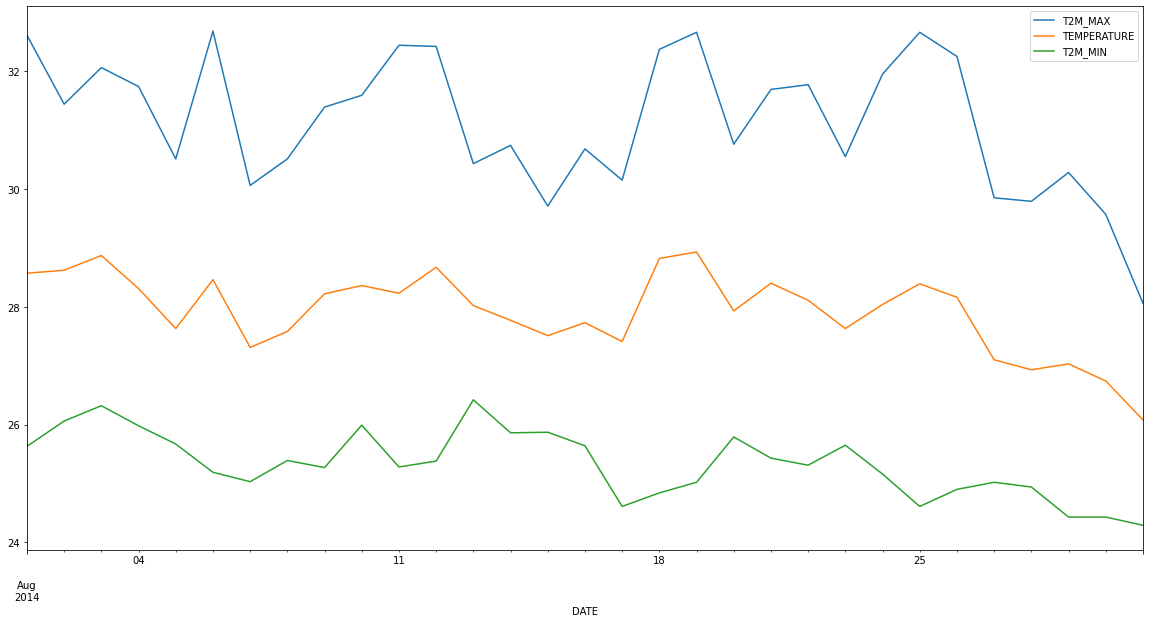

In [32]:
#plotting ''T2M_MAX','TEMPERATURE','T2M_MIN'of august 2014
#where  'T2M_MAX - maximum temperatire','T2M_MIN - minimum temperature'
aug2014.plot(y=['T2M_MAX','TEMPERATURE','T2M_MIN'],kind='line',figsize=(20,10))

In [33]:
#resampling
AUG = aug2014.resample(rule='D').mean()
AUG.head()

,SPECIFIC _HUMIDITY,RELATIVE_HUMIDITY,SURFACE_PRESSURE,T2M_MAX,T2M_MIN,TEMPERATURE,WIND_SPEED
DATE,,,,,,,
2014-08-01,21.07,83.72,97.83,32.61,25.63,28.57,4.93
2014-08-02,22.35,88.28,97.64,31.44,26.06,28.62,2.61
2014-08-03,22.05,85.76,97.51,32.06,26.32,28.87,3.89
2014-08-04,22.00,88.20,97.25,31.74,25.98,28.31,7.13
2014-08-05,20.66,86.34,97.44,30.51,25.67,27.63,7.56


<AxesSubplot:xlabel='DATE'>

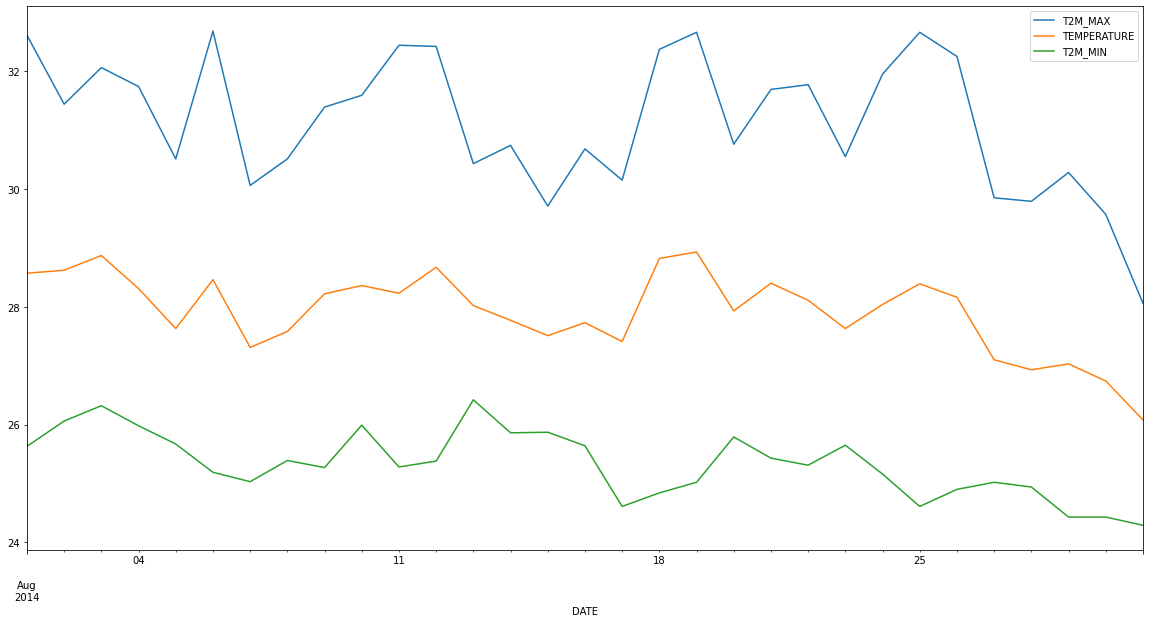

In [34]:
#plotting
AUG.plot(y=['T2M_MAX','TEMPERATURE','T2M_MIN'],kind='line',figsize=(20,10))

In [35]:
%%html
<h1><Li style="list-style-type: square"><span style="color: black">Difference in Maximum Temperature, Temperature and Minimum Temperature is easily visible.</span></Li></h1>



In [36]:
%%html
<h1 style="color: teal">Now Plotting as per Seasons.</h1>

In [37]:
#Assigning the seasons
winter = idata2['2015-01-01':'2015-02-28']
winter2 = idata2['2015-12-01':'2015-12-31']
spring = idata2['2015-03-01':'2015-05-31']
summer = idata2['2015-06-01':'2015-08-31']

<AxesSubplot:xlabel='DATE'>

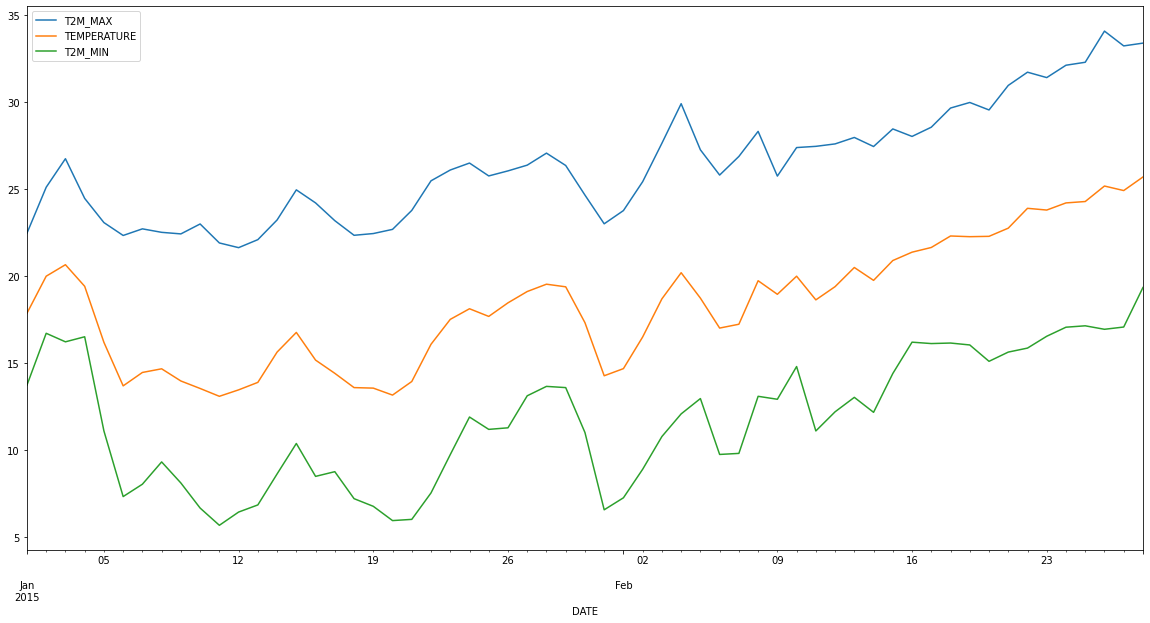

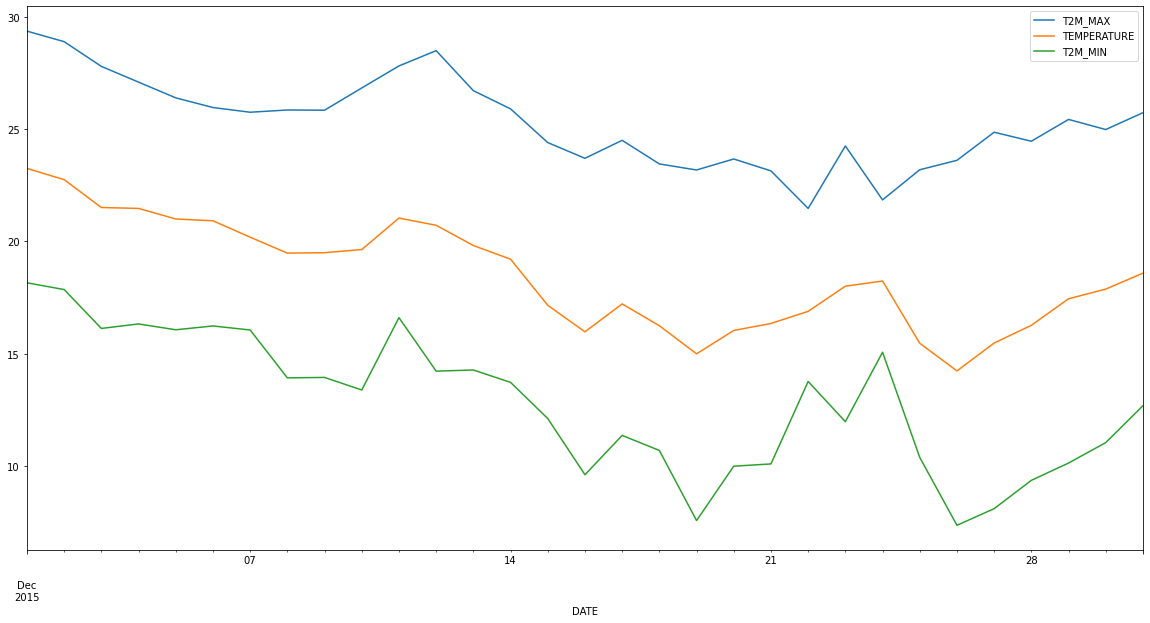

In [38]:
#plotting winter
winter.plot(y= ['T2M_MAX','TEMPERATURE','T2M_MIN'],figsize=(20,10))
winter2.plot(y= ['T2M_MAX','TEMPERATURE','T2M_MIN'],figsize=(20,10))

<AxesSubplot:xlabel='DATE'>

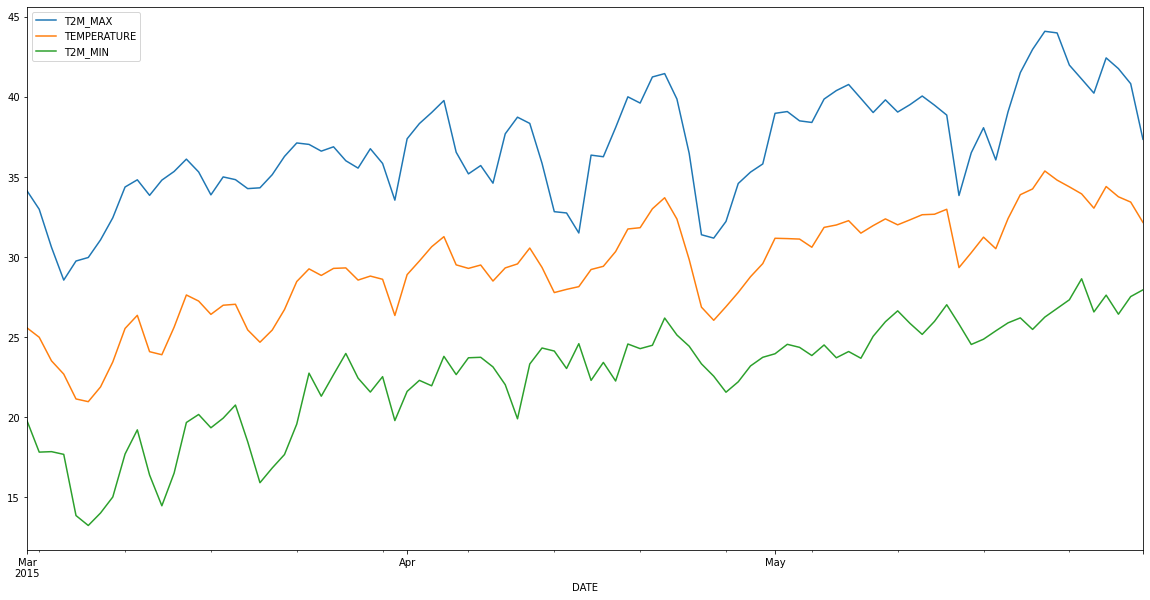

In [39]:
#plotting spring
spring.plot(y= ['T2M_MAX','TEMPERATURE','T2M_MIN'],figsize=(20,10))

<AxesSubplot:xlabel='DATE'>

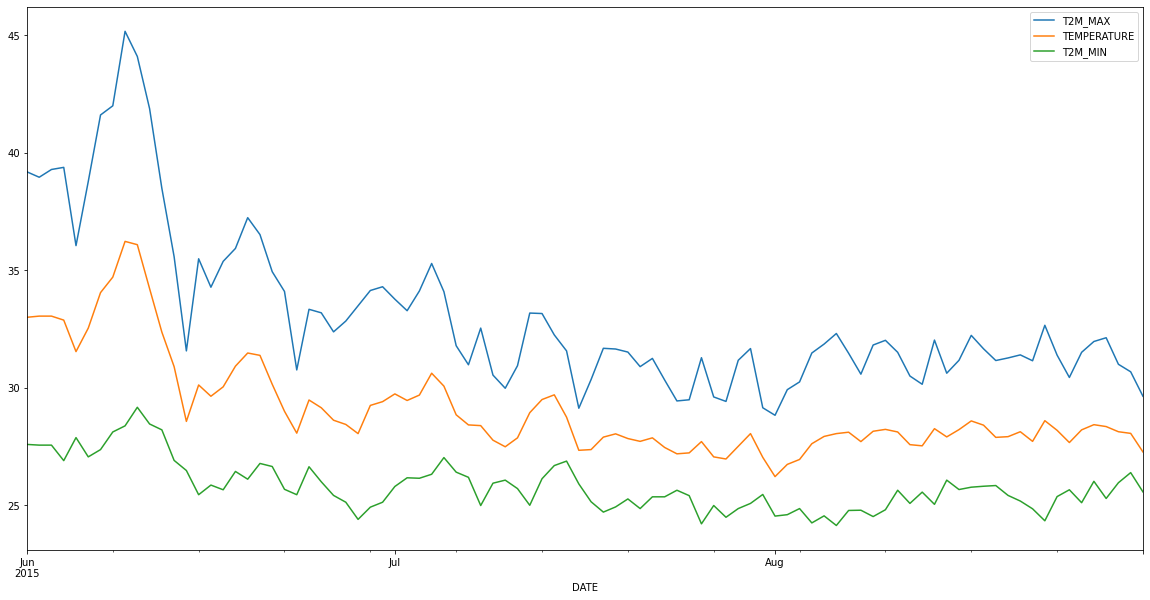

In [40]:
#plotting summer
summer.plot(y= ['T2M_MAX','TEMPERATURE','T2M_MIN'],figsize=(20,10))

In [41]:
%%html
<h1><a id="31" style="color: teal">Correlation in data</a></h1>

In [42]:
#checking correlation between the cols
df.corr()

,SPECIFIC _HUMIDITY,RELATIVE_HUMIDITY,SURFACE_PRESSURE,T2M_MAX,T2M_MIN,TEMPERATURE,WIND_SPEED
SPECIFIC _HUMIDITY,1.000000,0.721229,-0.800033,0.295376,0.825001,0.619047,0.239649
RELATIVE_HUMIDITY,0.721229,1.000000,-0.289052,-0.419331,0.239720,-0.070045,0.125134
SURFACE_PRESSURE,-0.800033,-0.289052,1.000000,-0.606800,-0.867835,-0.794067,-0.380280
T2M_MAX,0.295376,-0.419331,-0.606800,1.000000,0.750616,0.923241,0.132852
T2M_MIN,0.825001,0.239720,-0.867835,0.750616,1.000000,0.943630,0.217198
TEMPERATURE,0.619047,-0.070045,-0.794067,0.923241,0.943630,1.000000,0.165636
WIND_SPEED,0.239649,0.125134,-0.380280,0.132852,0.217198,0.165636,1.000000


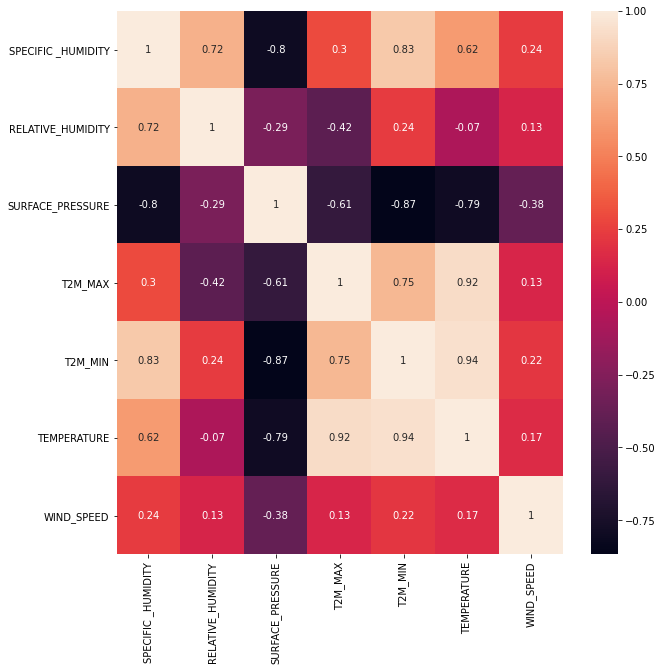

In [43]:
#plotting the correlation
plt.figure(figsize  =(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [44]:
%%html
<h1><a id="32" style="color:teal">Data Visualization</a></h1>

In [45]:
%%html
<h2><a id="31" style="color: teal">Plotting with Bivariate and Univariate graphs</a></h2>

In [46]:
%%html
<h2><a id="31" style="color: black">Here we use kind =‘reg’ which plots a linear regression line. Here the line is close to flat because we chose our variables to be uncorrelated</a></h2>

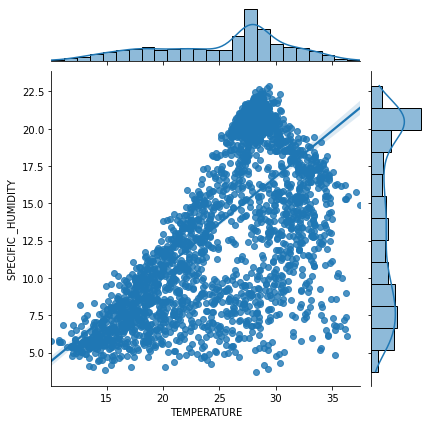

In [47]:
#plotting of two variables i.e SPECIFIC _HUMIDITY AND 'TEMPERATURE 
sns.jointplot(kind='reg',y=df['SPECIFIC _HUMIDITY'],x=df['TEMPERATURE'])

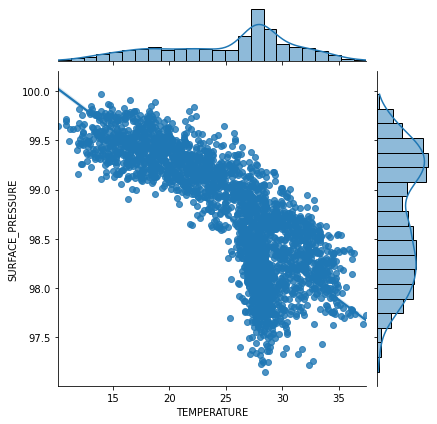

In [48]:
#plotting of two variables i.e SURFACE_PRESSURE AND TEMPERATURE 
sns.jointplot(kind='reg',y=df['SURFACE_PRESSURE'],x=df['TEMPERATURE'])

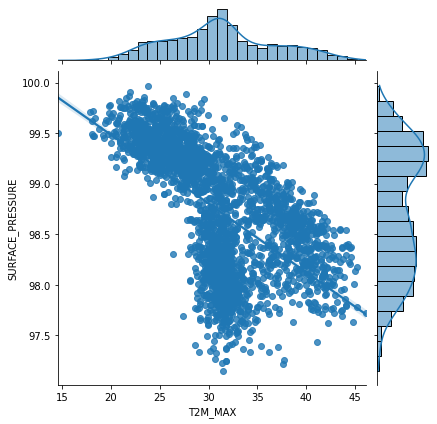

In [49]:
#plotting of two variables i.e SURFACE_PRESSURE AND T2M_MAX
sns.jointplot(kind='reg',y=df['SURFACE_PRESSURE'],x=df['T2M_MAX'])

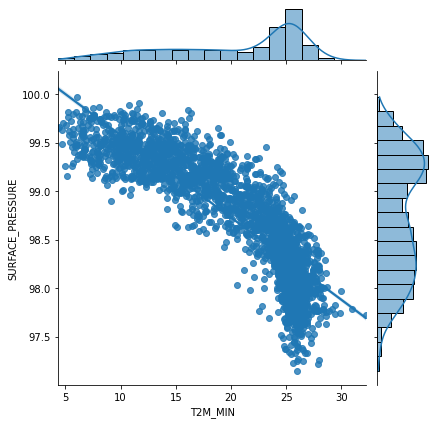

In [50]:
#plotting of two variables i.e SURFACE_PRESSURE AND T2M_MIN
sns.jointplot(kind='reg',y=df['SURFACE_PRESSURE'],x=df['T2M_MIN'])

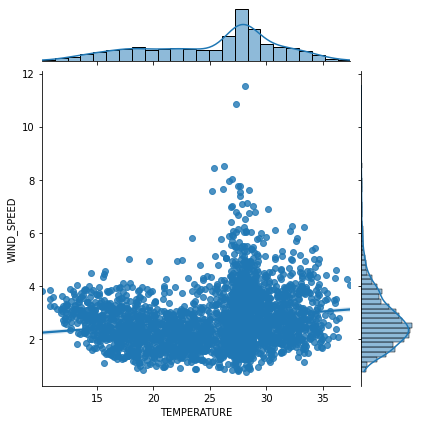

In [51]:
#plotting of two variables i.e WIND_SPEED AND TEMPERATURE
sns.jointplot(kind='reg',y=df['WIND_SPEED'],x=df['TEMPERATURE'])

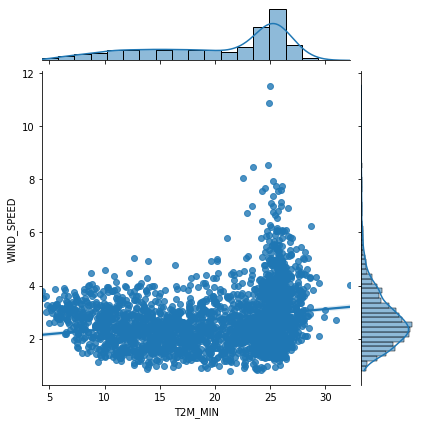

In [52]:
#plotting of two variables i.e WIND_SPEED AND T2M_MIN
sns.jointplot(kind='reg',y=df['WIND_SPEED'],x=df['T2M_MIN'])

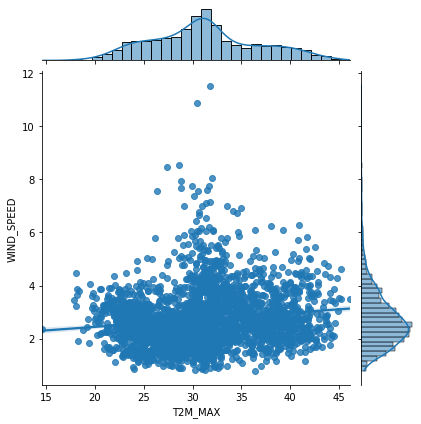

In [53]:
#plotting of two variables i.e WIND_SPEED AND T2M_MAX
sns.jointplot(kind='reg',y=df['WIND_SPEED'],x=df['T2M_MAX'])

In [54]:
%%html
<h2><a id="31" style="color: black">Here we use kind =‘hex’ which  bins the data into hexagons with histograms in the margins. At this point we probably see the “pre-cooked” nature of jointplot. It provides nice defaults.</a></h2>

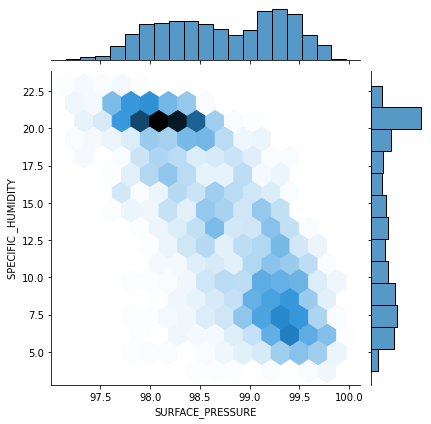

In [55]:
#plotting of two variables i.e SPECIFIC _HUMIDITY AND SURFACE_PRESSURE
sns.jointplot(kind='hex',y=df['SPECIFIC _HUMIDITY'],x=df['SURFACE_PRESSURE'])

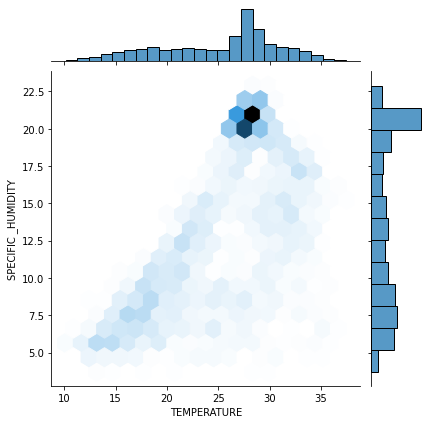

In [56]:
#plotting of two variables i.e SPECIFIC _HUMIDITY AND TEMPERATURE 
sns.jointplot(kind='hex',y=df['SPECIFIC _HUMIDITY'],x=df['TEMPERATURE'])

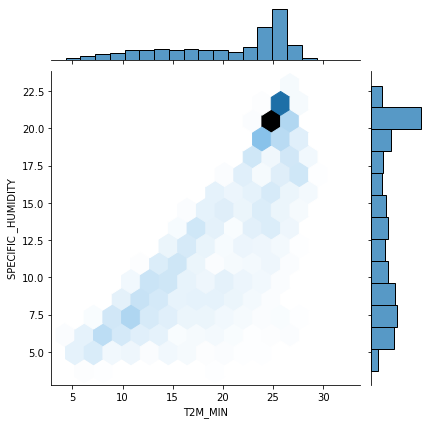

In [57]:
#plotting of two variables i.e SPECIFIC _HUMIDITY AND T2M_MIN 
sns.jointplot(kind='hex',y=df['SPECIFIC _HUMIDITY'],x=df['T2M_MIN'])

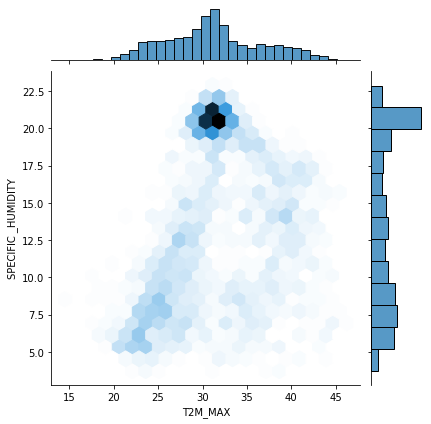

In [58]:
#plotting of two variables i.e SPECIFIC _HUMIDITY AND T2M_MAX
sns.jointplot(kind='hex',y=df['SPECIFIC _HUMIDITY'],x=df['T2M_MAX'])

<Figure size 1440x1440 with 0 Axes>

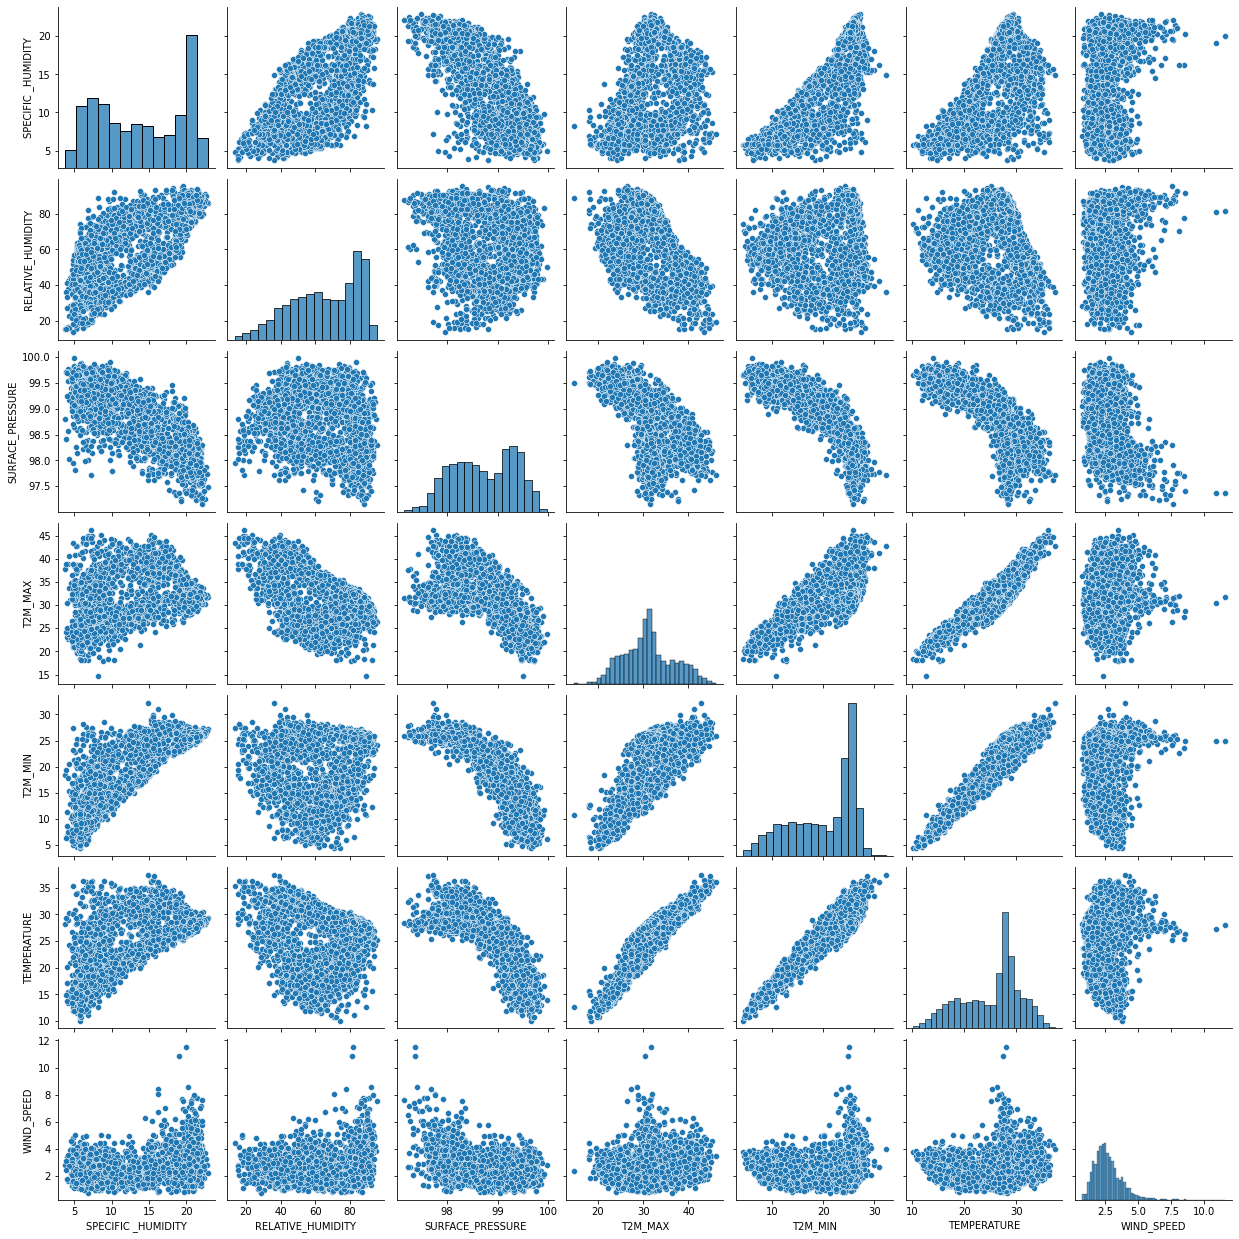

In [59]:
#combine figure
plt.figure(figsize  =(20,20))
sns.pairplot(df)
plt.show()

In [60]:
#taking 70% of the data for training
X = idata['2021-01-01':'2021-07-20']
X

,SPECIFIC _HUMIDITY,RELATIVE_HUMIDITY,SURFACE_PRESSURE,T2M_MAX,T2M_MIN,TEMPERATURE,WIND_SPEED
DATE,,,,,,,
2021-01-01,7.19,68.15,99.52,23.01,8.49,14.77,2.79
2021-01-02,7.58,64.61,99.47,23.43,9.58,16.41,2.11
2021-01-03,8.09,60.79,99.29,25.04,11.46,18.36,1.16
2021-01-04,8.67,63.07,99.35,25.60,13.05,18.89,1.15
2021-01-05,9.95,71.05,99.36,26.78,12.09,19.18,2.01
...,...,...,...,...,...,...,...
2021-07-16,19.72,86.00,98.51,29.51,25.23,27.11,2.77
2021-07-17,21.45,87.97,98.33,31.81,24.87,28.10,3.70
2021-07-18,20.39,82.91,98.15,32.46,25.43,28.23,2.89


In [61]:
#30% of data for testing
X1 = idata['2020-07-21':'2020-12-31']
X1

,SPECIFIC _HUMIDITY,RELATIVE_HUMIDITY,SURFACE_PRESSURE,T2M_MAX,T2M_MIN,TEMPERATURE,WIND_SPEED
DATE,,,,,,,
2020-07-21,20.80,89.59,98.22,29.63,25.83,27.25,3.36
2020-07-22,20.32,83.99,98.21,31.65,25.07,27.96,3.16
2020-07-23,20.70,84.17,98.15,31.58,25.23,28.23,1.25
2020-07-24,20.16,85.52,98.41,30.90,24.93,27.55,2.49
2020-07-25,20.01,80.85,98.51,32.51,24.10,28.41,2.20
...,...,...,...,...,...,...,...
2020-12-27,5.89,54.79,99.32,22.60,7.22,15.03,1.96
2020-12-28,6.64,55.33,99.24,23.34,9.85,16.74,1.47
2020-12-29,7.84,67.08,99.31,23.84,9.82,16.32,2.10


In [62]:
#taking cols for training the model
X_train = X[['T2M_MAX','T2M_MIN','SPECIFIC _HUMIDITY','WIND_SPEED','SURFACE_PRESSURE']]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2021-01-01 to 2021-07-20
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   T2M_MAX             201 non-null    float64
 1   T2M_MIN             201 non-null    float64
 2   SPECIFIC _HUMIDITY  201 non-null    float64
 3   WIND_SPEED          201 non-null    float64
 4   SURFACE_PRESSURE    201 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB


In [63]:
Y_train = X['TEMPERATURE']
Y_train

DATE
2021-01-01    14.77
2021-01-02    16.41
2021-01-03    18.36
2021-01-04    18.89
2021-01-05    19.18
              ...  
2021-07-16    27.11
2021-07-17    28.10
2021-07-18    28.23
2021-07-19    28.57
2021-07-20    27.39
Name: TEMPERATURE, Length: 201, dtype: float64

In [64]:
#using LinearRegression() model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,Y_train)

LinearRegression()

In [65]:
X_test = X1[['T2M_MAX','T2M_MIN','SPECIFIC _HUMIDITY','WIND_SPEED','SURFACE_PRESSURE']]
X_test

,T2M_MAX,T2M_MIN,SPECIFIC _HUMIDITY,WIND_SPEED,SURFACE_PRESSURE
DATE,,,,,
2020-07-21,29.63,25.83,20.80,3.36,98.22
2020-07-22,31.65,25.07,20.32,3.16,98.21
2020-07-23,31.58,25.23,20.70,1.25,98.15
2020-07-24,30.90,24.93,20.16,2.49,98.41
2020-07-25,32.51,24.10,20.01,2.20,98.51
...,...,...,...,...,...
2020-12-27,22.60,7.22,5.89,1.96,99.32
2020-12-28,23.34,9.85,6.64,1.47,99.24
2020-12-29,23.84,9.82,7.84,2.10,99.31


In [66]:
Y_test = X1['TEMPERATURE']
Y_test

DATE
2020-07-21    27.25
2020-07-22    27.96
2020-07-23    28.23
2020-07-24    27.55
2020-07-25    28.41
              ...  
2020-12-27    15.03
2020-12-28    16.74
2020-12-29    16.32
2020-12-30    15.01
2020-12-31    14.14
Name: TEMPERATURE, Length: 164, dtype: float64

In [67]:
#predicting the Temperature
y_pred = regr.predict(X_test)

In [72]:
regr.score(X_test,Y_test)

0.9959292715627627

In [73]:
#actual value vs predicted value
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
DATE,,
2020-07-21,27.25,27.126368
2020-07-22,27.96,28.018369
2020-07-23,28.23,28.258766
2020-07-24,27.55,27.515065
2020-07-25,28.41,28.133676
...,...,...
2020-12-27,15.03,14.470878
2020-12-28,16.74,16.070440
2020-12-29,16.32,16.350383


In [74]:
#error measurement
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.23863624990854335
Mean Squared Error:  0.09221348242916859
Root Mean Squared Error:  0.30366672921011384
